In [188]:
import sklearn.model_selection
import sklearn.tree
import pandas
import sklearn.ensemble
import sklearn.linear_model
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = 'C:\\Users\\Alexey.Osipov\\Downloads\\'
tabHot = pandas.read_csv(path + 'HotStartData.csv', sep = ';')
tabCold = pandas.read_csv(path + 'ColdStartData.csv', sep = ';')

In [3]:
tabHot = pandas.concat([tabHot.drop('GenderInfo', axis=1), pandas.get_dummies(tabHot['GenderInfo'])], axis=1)
tabCold = pandas.concat([tabCold.drop('GenderInfo', axis=1), pandas.get_dummies(tabCold['GenderInfo'])], axis=1)

In [4]:
yHot = tabHot.Class
yCold = tabCold.Class
XHot = tabHot.drop('Class', axis=1)
XCold = tabCold.drop('Class', axis=1)

In [5]:
X_train_Hot, X_test_Hot, y_train_Hot, y_test_Hot = sklearn.model_selection.train_test_split(XHot, yHot, random_state=239)
X_train_Cold, X_test_Cold, y_train_Cold, y_test_Cold = sklearn.model_selection.train_test_split(XCold, yCold, random_state=239)

In [6]:
X_train_Hot.head(), y_train_Hot.head()

(     Duration  CreditHistory  Employment  Guarantors  Age  \
 91   0.666667             -2           4           0   54   
 436  0.333333              1           3           0   23   
 22   0.555556             -2           1           0   48   
 237  1.166667              1           4           0   61   
 848  0.500000              1           3           0   59   
 
      NumberOfCreditsInBank  JobInfo  NumberOfPeopleBeingLiable       Val  \
 91                       1        2                          1 -0.692948   
 436                      1        1                          1 -1.669664   
 22                       2        1                          2 -0.095321   
 237                      2        1                          1  0.176217   
 848                      1        2                          1 -0.734750   
 
      Telephone  Foreign  A91  A92  A93  A94  
 91           0        1    0    0    1    0  
 436          0        1    0    0    0    1  
 22           0      

In [7]:
def modelFit(model, X_train, y_train):
    random_states = [128, 239, 28]
    stat_prec = 0
    stat_brier = 0
    stat_acc = 0
    for random_state in random_states:
        X_1, X_2, y_1, y_2 = sklearn.model_selection.train_test_split(X_train, y_train, random_state = random_state)
        model.fit(X_1, y_1)
        stat_prec += sklearn.metrics.average_precision_score(model.predict(X_2), y_2)
        stat_brier += sklearn.metrics.brier_score_loss(pandas.DataFrame(model.predict_proba(X_2))[1], y_2)
        stat_acc += sklearn.metrics.accuracy_score(model.predict(X_2), y_2)
    return stat_prec/3, stat_acc/3, stat_brier/3

In [146]:
def modelCheck(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    probs = pandas.DataFrame(model.predict_proba(X_test))
    print(probs.describe())
    vals = model.predict(X_test)
    return [sklearn.metrics.average_precision_score(y_test, vals),
    sklearn.metrics.accuracy_score(y_test, vals),
    sklearn.metrics.brier_score_loss(y_test, probs[1])]

In [9]:
print(y_train_Hot.count())

750


In [10]:
#estimate baseline
baselineTrain = []
print(y_train_Hot.count())
for i in range(0, y_train_Hot.count()):
    baselineTrain.append(0)
baselineTest = []
for i in range(0, y_test_Hot.count()):
    baselineTest.append(0)
baselineTrainprobs = []
print(y_train_Hot.count())
for i in range(0, y_train_Hot.count()):
    baselineTrainprobs.append(0.3)
baselineTestprobs = []
for i in range(0, y_test_Hot.count()):
    baselineTestprobs.append(0.3)

print([sklearn.metrics.average_precision_score(y_train_Hot, baselineTrain),
    sklearn.metrics.accuracy_score(y_train_Hot, baselineTrain),
    sklearn.metrics.brier_score_loss(y_train_Hot, baselineTrainprobs)])
print([sklearn.metrics.average_precision_score(y_test_Hot, baselineTest),
    sklearn.metrics.accuracy_score(y_test_Hot, baselineTest),
    sklearn.metrics.brier_score_loss(y_test_Hot, baselineTestprobs)])

750
750
[0.304, 0.696, 0.21159999999999995]
[0.288, 0.712, 0.20519999999999994]


In [143]:
#we try to delete:
#(array([0.23820197, 0.14917393, 0.02341734, 0.17343024, 0.01618086,
#        0.05331723, 0.04089416, 0.19852072, 0.03420262, 0.01826004,
#        0.02292333, 0.02485296, 0.00462944, 0.00199515]),
# Index(['Duration', 'CreditHistory', 'Employment', 'Guarantors', 'Age',
#        'NumberOfCreditsInBank', 'JobInfo', 'NumberOfPeopleBeingLiable', 'Val',
#        'Telephone', 'Foreign', 'A91', 'A92', 'A93', 'A94'],
#       dtype='object'))
#gender info -> delete
#Foreign -> delete
#Employment -> delete


In [14]:
X_train_Hot=X_train_Hot.drop('A91', axis=1)
X_train_Hot=X_train_Hot.drop('A92',  axis=1)
X_train_Hot=X_train_Hot.drop('A93',  axis=1)
X_train_Hot=X_train_Hot.drop('A94',  axis=1)
X_train_Hot=X_train_Hot.drop('Foreign',  axis=1)
X_test_Hot=X_test_Hot.drop('A91',  axis=1)
X_test_Hot=X_test_Hot.drop('A92',  axis=1)
X_test_Hot=X_test_Hot.drop('A93',  axis=1)
X_test_Hot=X_test_Hot.drop('A94',  axis=1)
X_test_Hot=X_test_Hot.drop('Foreign',  axis=1)


In [15]:
X_test_Hot=X_test_Hot.drop('JobInfo',  axis=1)
X_train_Hot=X_train_Hot.drop('JobInfo',  axis=1)

In [16]:
X_train_Hot.columns

Index(['Duration', 'CreditHistory', 'Employment', 'Guarantors', 'Age',
       'NumberOfCreditsInBank', 'NumberOfPeopleBeingLiable', 'Val',
       'Telephone'],
      dtype='object')

In [147]:
#RF only
modelRF = sklearn.ensemble.RandomForestClassifier(n_estimators=11,random_state=239, max_depth=20,min_samples_leaf=4, min_samples_split=0.1)
print(modelFit(modelRF, X_train_Hot, y_train_Hot))
print(modelCheck(modelRF, X_train_Hot, y_train_Hot, X_test_Hot, y_test_Hot))

(0.11098103213247144, 0.6808510638297872, 0.3120567375886525)
                0           1
count  250.000000  250.000000
mean     0.696770    0.303230
std      0.131103    0.131103
min      0.266070    0.072747
25%      0.612528    0.203816
50%      0.707010    0.292990
75%      0.796184    0.387472
max      0.927253    0.733930
[0.3408888888888889, 0.724, 0.1850746286036134]


In [18]:
modelRF.feature_importances_, X_train_Hot.columns

(array([0.24819208, 0.20774852, 0.13678787, 0.01694938, 0.12460749,
        0.0081914 , 0.01714867, 0.22306932, 0.01730526]),
 Index(['Duration', 'CreditHistory', 'Employment', 'Guarantors', 'Age',
        'NumberOfCreditsInBank', 'NumberOfPeopleBeingLiable', 'Val',
        'Telephone'],
       dtype='object'))

In [19]:
#cold case:
X_train_Cold=X_train_Cold.drop('A91', axis=1)
X_train_Cold=X_train_Cold.drop('A92',  axis=1)
X_train_Cold=X_train_Cold.drop('A93',  axis=1)
X_train_Cold=X_train_Cold.drop('A94',  axis=1)
X_train_Cold=X_train_Cold.drop('Foreign',  axis=1)
X_test_Cold=X_test_Cold.drop('A91',  axis=1)
X_test_Cold=X_test_Cold.drop('A92',  axis=1)
X_test_Cold=X_test_Cold.drop('A93',  axis=1)
X_test_Cold=X_test_Cold.drop('A94',  axis=1)
X_test_Cold=X_test_Cold.drop('Foreign',  axis=1)


In [20]:
X_test_Cold=X_test_Cold.drop('JobInfo',  axis=1)
X_train_Cold=X_train_Cold.drop('JobInfo',  axis=1)

In [21]:
#RF only
modelRF2 = sklearn.ensemble.RandomForestClassifier(n_estimators=11,random_state=239, max_depth=5,min_samples_leaf=5, min_samples_split=0.1)
print(modelFit(modelRF2, X_train_Cold, y_train_Cold))
print(modelCheck(modelRF2, X_train_Cold, y_train_Cold, X_test_Cold, y_test_Cold))

(0.04696550378653006, 0.6790780141843972, 0.30851063829787234)
                0           1
count  250.000000  250.000000
mean     0.690863    0.309137
std      0.089876    0.089876
min      0.390907    0.132616
25%      0.643003    0.245470
50%      0.700198    0.299802
75%      0.754530    0.356997
max      0.867384    0.609093
[0.3065802469135802, 0.716, 0.19382510871766315]


In [22]:
modelRF2.feature_importances_, X_train_Cold.columns

(array([0.2572975 , 0.16803575, 0.04408606, 0.16036929, 0.03286046,
        0.03004907, 0.26416688, 0.04313499]),
 Index(['Duration', 'Employment', 'Guarantors', 'Age', 'NumberOfCreditsInBank',
        'NumberOfPeopleBeingLiable', 'Val', 'Telephone'],
       dtype='object'))

In [39]:
#logsitic regression only
modelReg = sklearn.linear_model.LogisticRegression(penalty = 'l1', random_state=239, C=0.5)
print(modelFit(modelReg, X_train_Hot, y_train_Hot))
print(modelCheck(modelReg, X_train_Hot, y_train_Hot, X_test_Hot, y_test_Hot))

(0.08629639261679312, 0.6914893617021276, 0.3120567375886525)
                0           1
count  250.000000  250.000000
mean     0.696873    0.303127
std      0.131749    0.131749
min      0.180092    0.057227
25%      0.606668    0.210124
50%      0.705893    0.294107
75%      0.789876    0.393332
max      0.942773    0.819908
[0.3181764705882353, 0.716, 0.18354853125747053]


In [49]:
#logsitic regression only
modelReg2 = sklearn.linear_model.LogisticRegression(penalty = 'l1', random_state=239, C=0.5)
print(modelFit(modelReg2, X_train_Cold, y_train_Cold))
print(modelCheck(modelReg2, X_train_Cold, y_train_Cold, X_test_Cold, y_test_Cold))

(0.07217520577971141, 0.6843971631205674, 0.31560283687943264)
                0           1
count  250.000000  250.000000
mean     0.689918    0.310082
std      0.116737    0.116737
min      0.199299    0.107166
25%      0.629946    0.232210
50%      0.705209    0.294791
75%      0.767790    0.370054
max      0.892834    0.800701
[0.3251604938271605, 0.72, 0.1923673512244785]


In [83]:
#decision tree only
modelTree = sklearn.tree.DecisionTreeClassifier(random_state=239, max_depth=3)
print(modelFit(modelTree, X_train_Hot, y_train_Hot))
print(modelCheck(modelTree, X_train_Hot, y_train_Hot, X_test_Hot, y_test_Hot))

(0.12581358211312318, 0.6985815602836879, 0.3120567375886525)
                0           1
count  250.000000  250.000000
mean     0.699411    0.300589
std      0.160995    0.160995
min      0.000000    0.000000
25%      0.766727    0.233273
50%      0.766727    0.233273
75%      0.766727    0.233273
max      1.000000    1.000000
[0.32558730158730154, 0.7, 0.20907351965677254]


In [67]:
modelTree.feature_importances_, X_train_Hot.columns

(array([0.29214226, 0.27927553, 0.        , 0.        , 0.14322228,
        0.        , 0.09823608, 0.18712386, 0.        ]),
 Index(['Duration', 'CreditHistory', 'Employment', 'Guarantors', 'Age',
        'NumberOfCreditsInBank', 'NumberOfPeopleBeingLiable', 'Val',
        'Telephone'],
       dtype='object'))

In [81]:
#decision tree only
modelTree2 = sklearn.tree.DecisionTreeClassifier(random_state=239, max_depth=4)
print(modelFit(modelTree2, X_train_Cold, y_train_Cold))
print(modelCheck(modelTree2, X_train_Cold, y_train_Cold, X_test_Cold, y_test_Cold))

(0.11163642532270611, 0.6826241134751774, 0.3120567375886525)
                0           1
count  250.000000  250.000000
mean     0.685788    0.314212
std      0.167988    0.167988
min      0.000000    0.037037
25%      0.618056    0.232044
50%      0.767956    0.232044
75%      0.767956    0.381944
max      0.962963    1.000000
[0.3454259259259259, 0.728, 0.19722244269115827]


In [85]:
modelTree2.feature_importances_, X_train_Cold.columns

(array([0.43367656, 0.09185051, 0.        , 0.12661024, 0.        ,
        0.08519873, 0.26266396, 0.        ]),
 Index(['Duration', 'Employment', 'Guarantors', 'Age', 'NumberOfCreditsInBank',
        'NumberOfPeopleBeingLiable', 'Val', 'Telephone'],
       dtype='object'))

In [139]:
#we try to blend 2 or 3 models:
def modelFitFor3(model1, model2, model3, X_train, y_train, control=3):
    random_states = [128, 239, 28]
    stat_prec = 0
    stat_brier = 0
    stat_acc = 0
    for random_state in random_states:
        X_1, X_2, y_1, y_2 = sklearn.model_selection.train_test_split(X_train, y_train, random_state = random_state)
        model1.fit(X_1, y_1)
        model2.fit(X_1, y_1)
        model3.fit(X_1, y_1)
        if (control==3):
            xvec=(0.333333*(model1.predict(X_2)+model2.predict(X_2)+model3.predict(X_2)))
        else:
            xvec=(0.5*(model2.predict(X_2)+model3.predict(X_2)))
        for i in range(0, len(xvec)): 
            xvec[i] = round(xvec[i])
        #print(xvec)
        #print(0.3*(model1.predict(X_2) + model2.predict(X_2) + model3.predict(X_2)))
        stat_prec += sklearn.metrics.average_precision_score(xvec, y_2)
        if (control==3):
            stat_brier += sklearn.metrics.brier_score_loss(0.33333*(pandas.DataFrame(model1.predict_proba(X_2))[1] + pandas.DataFrame(model2.predict_proba(X_2))[1] + pandas.DataFrame(model3.predict_proba(X_2))[1]), y_2)
        else:
            stat_brier += sklearn.metrics.brier_score_loss(0.5*(pandas.DataFrame(model2.predict_proba(X_2))[1] + pandas.DataFrame(model3.predict_proba(X_2))[1]), y_2)
        stat_acc += sklearn.metrics.accuracy_score(xvec, y_2)
    return stat_prec/3, stat_acc/3, stat_brier/3    

In [154]:
def modelCheckFor3(model1, model2, model3, X_train, y_train, X_test, y_test, control=3):
    model1.fit(X_train, y_train)
    model2.fit(X_train, y_train)
    model3.fit(X_train, y_train)

    if (control==3):
        vals=(0.3333333*(model1.predict(X_test)+model2.predict(X_test)+model3.predict(X_test)))
    else:
        vals=(0.5*(model2.predict(X_test)+model3.predict(X_test)))
        
    for i in range(0, len(vals)): 
        vals[i] = round(vals[i])

    if (control==3):
        probs=(0.3333333*(pandas.DataFrame(model1.predict_proba(X_test))+pandas.DataFrame(model2.predict_proba(X_test))+pandas.DataFrame(model3.predict_proba(X_test))))
    else:
        probs=(0.5*(pandas.DataFrame(model2.predict_proba(X_test))+pandas.DataFrame(model3.predict_proba(X_test))))
    
    print(probs.describe())
    return [sklearn.metrics.average_precision_score(y_test, vals),
    sklearn.metrics.accuracy_score(y_test, vals),
    sklearn.metrics.brier_score_loss(y_test, probs[1])]

In [140]:
modelFitFor3(modelRF, modelTree, modelReg, X_train_Hot, y_train_Hot)

(0.09493811494079685, 0.6950354609929078, 0.3120567375886525)

In [141]:
modelFitFor3(modelRF, modelTree, modelReg, X_train_Hot, y_train_Hot, 2)

(0.05316086245372853, 0.6950354609929078, 0.3120567375886525)

In [155]:
modelCheckFor3(modelRF, modelTree, modelReg, X_train_Hot, y_train_Hot, X_test_Hot, y_test_Hot)

                0           1
count  250.000000  250.000000
mean     0.697685    0.302315
std      0.118828    0.118828
min      0.323070    0.130803
25%      0.649758    0.218190
50%      0.724302    0.275698
75%      0.781810    0.350242
max      0.869197    0.676930


[0.324026455026455, 0.716, 0.18655312963960727]

In [156]:
modelCheckFor3(modelRF, modelTree, modelReg, X_train_Hot, y_train_Hot, X_test_Hot, y_test_Hot, 2)

                0           1
count  250.000000  250.000000
mean     0.698142    0.301858
std      0.124307    0.124307
min      0.243215    0.145250
25%      0.668643    0.218150
50%      0.734722    0.265278
75%      0.781850    0.331357
max      0.854750    0.756785


[0.3094545454545454, 0.716, 0.1901478294674256]

In [157]:
modelFitFor3(modelRF2, modelTree2, modelReg2, X_train_Cold, y_train_Cold)

(0.05514692874785848, 0.6790780141843972, 0.31560283687943264)

In [158]:
modelFitFor3(modelRF2, modelTree2, modelReg2, X_train_Cold, y_train_Cold, 2)

(0.03694858558080443, 0.6914893617021276, 0.3120567375886525)

In [159]:
modelCheckFor3(modelRF2, modelTree2, modelReg2, X_train_Cold, y_train_Cold, X_test_Cold, y_test_Cold)

                0           1
count  250.000000  250.000000
mean     0.688856    0.311144
std      0.107560    0.107560
min      0.314145    0.092430
25%      0.647280    0.245801
50%      0.713459    0.286541
75%      0.754199    0.352720
max      0.907570    0.685855


[0.3251604938271605, 0.72, 0.18941441171174264]

In [160]:
modelCheckFor3(modelRF2, modelTree2, modelReg2, X_train_Cold, y_train_Cold, X_test_Cold, y_test_Cold, 2)

                0           1
count  250.000000  250.000000
mean     0.687853    0.312147
std      0.125160    0.125160
min      0.255367    0.072337
25%      0.647438    0.240992
50%      0.715860    0.284140
75%      0.759008    0.352562
max      0.927663    0.744633


[0.327, 0.724, 0.18955283609858478]

In [161]:
X_train_solo = X_train_Cold.Val
X_test_solo = X_test_Cold.Val

In [162]:
X_train_solo.describe()

count    750.000000
mean       0.024371
std        0.996459
min       -2.919902
25%       -0.721600
50%       -0.030872
75%        0.650590
max        2.431774
Name: Val, dtype: float64

In [168]:
modelRegSolo = sklearn.linear_model.LogisticRegression(random_state=239)
print(modelFit(modelRegSolo, pandas.DataFrame(X_train_solo), y_train_Hot))
print(modelCheck(modelRegSolo, pandas.DataFrame(X_train_solo), y_train_Hot, pandas.DataFrame(X_test_solo), y_test_Hot))

(nan, 0.6861702127659575, 0.3120567375886525)
                0           1
count  250.000000  250.000000
mean     0.699536    0.300464
std      0.048989    0.048989
min      0.559055    0.185397
25%      0.668574    0.264770
50%      0.707883    0.292117
75%      0.735230    0.331426
max      0.814603    0.440945
[0.288, 0.712, 0.20197657008867076]


C:\Users\Alexey.Osipov\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\ranking.py:444: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


In [172]:
modelRegSolo.coef_, modelRegSolo.intercept_

(array([[0.2297213]]), array([-0.8387111]))

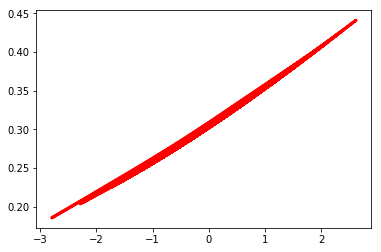

In [197]:


def model(x):
    return 1 / (1 + np.exp(-x))

X_tt = pandas.DataFrame(X_test_solo).values

loss = model(X_tt * modelRegSolo.coef_ + modelRegSolo.intercept_).ravel()
plt.plot(X_tt, loss, color='red', linewidth=3)

In [196]:
pandas.DataFrame(X_test_solo).values

array([[ 5.22992747e-01],
       [-8.07585643e-01],
       [-2.21250474e+00],
       [-5.31645848e-01],
       [-2.56744647e-01],
       [ 2.46852286e-01],
       [ 3.32088360e-01],
       [-6.17508046e-01],
       [ 4.22069119e-01],
       [-3.02496297e-01],
       [-1.35754622e+00],
       [-5.80964170e-01],
       [-3.35310121e-01],
       [-6.84747442e-01],
       [-1.05706649e-01],
       [ 4.77393145e-01],
       [-6.26157325e-01],
       [-2.69839554e-01],
       [ 1.16073178e+00],
       [-1.13260178e-01],
       [-3.65433080e-01],
       [ 6.99179742e-01],
       [ 7.64773763e-01],
       [-6.31374912e-01],
       [-8.70021570e-01],
       [-1.06865851e-01],
       [ 1.12936415e+00],
       [-4.85702093e-01],
       [ 1.36194885e+00],
       [-8.65212271e-03],
       [ 9.76285974e-01],
       [-8.08585156e-01],
       [-1.00245381e+00],
       [-1.08154804e+00],
       [ 6.37568532e-01],
       [-8.22660407e-01],
       [ 1.28794346e+00],
       [-2.22746276e+00],
       [ 6.4

In [171]:
modelTreeSolo = sklearn.tree.DecisionTreeClassifier(random_state=239, max_depth=200)
print(modelFit(modelTreeSolo, pandas.DataFrame(X_train_solo), y_train_Hot))
print(modelCheck(modelTreeSolo, pandas.DataFrame(X_train_solo), y_train_Hot, pandas.DataFrame(X_test_solo), y_test_Hot))

(0.31168800065337404, 0.5726950354609929, 0.42730496453900707)
               0          1
count  250.00000  250.00000
mean     0.72600    0.27400
std      0.43897    0.43897
min      0.00000    0.00000
25%      0.00000    0.00000
50%      1.00000    0.00000
75%      1.00000    1.00000
max      1.00000    1.00000
[0.3034188034188034, 0.628, 0.371]


In [198]:
quantIntens = pandas.read_csv(path + 'quantIntensDatFor3DataSet.csv', sep = ';')

In [200]:
quantIntens['x'] = (quantIntens['quants1'] + quantIntens['quants2'])/2
quantIntens['val'] = quantIntens['numOfFrauds']/quantIntens['numOfRows']

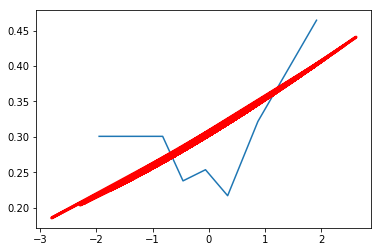

In [203]:
plt.plot(quantIntens.x.values, quantIntens.val.values)
def model(x):
    return 1 / (1 + np.exp(-x))

X_tt = pandas.DataFrame(X_test_solo).values

loss = model(X_tt * modelRegSolo.coef_ + modelRegSolo.intercept_).ravel()
plt.plot(X_tt, loss, color='red', linewidth=3)